# UncertainTaggerBuilderTest

Ad-hoc testing for the UncertainTaggerBuilder class.

In [1]:
import os
import pickle
import pandas as pd
import scipy
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from MotifFeatures.UncertainTaggerBuilder import UncertainTaggerBuilder
from MotifFeatures.Labels.BIOELabel import BIOELabel

In [2]:
train_path = os.path.join('datasets', 'occ_45K_train.pickle')
with open(train_path, 'rb') as dbfile:
    train = pickle.load(dbfile)
motifs_path = os.path.join(
    'MotifFeatures', 'MotifGopher',
    'Gopher_01-49PM_21_Mar_2021_motifs.pickle')
with open(motifs_path, 'rb') as dbfile:
    motifs = pickle.load(dbfile)

In [3]:
def tag_matrix(dataset, textgetter, entitygetter):
    """Return a four-column dataframe of the BIOELabel output for
    matches to the entity returned by entitygetter.
    """
    data = {tag: [] for tag in ('raw', 'B', 'I', 'O', 'E')}
    def process(row):
        data['raw'].append(textgetter(row))
        for tag, value in BIOELabel(
                textgetter(row), entitygetter(row)).tags().items():
            data[tag].append(value)
    dataset.apply(process, axis=1)
    return pd.DataFrame(data)
author_tags_path = os.path.join('datasets', 'author_tags_scratch.pickle')
if not os.path.exists(author_tags_path):
    t0 = time.time()
    author_tags = tag_matrix(
        train, lambda row: row.raw, lambda row: row.author.surnames()
    )
    print('Author tags generated in {:.2f} seconds.'.format(
        time.time() - t0))
    with open(author_tags_path, 'ab') as dbfile:
        pickle.dump(author_tags, dbfile, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(author_tags_path, 'rb') as dbfile:
        author_tags = pickle.load(dbfile)
author_tags.head()

,raw,B,I,O,E
0,"Knechtle, B, Knechtle, P, Schulze, I, Kohler, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Sousa, M, Fernandes, MJ, Moreira, P, Teixeira,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,"Schooler, J. (2011). Unpublished results hide ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"Melin, A, Tornberg, AB, Skouby, S, Moller, SS,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,"Schenk, K, Faulhaber, M, Gatterer, H, Burtsche...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [4]:
sample = author_tags.sample(15000)
t0 = time.time()
utb = UncertainTaggerBuilder(
    texts=sample.raw, tags=sample.B, motifs=motifs, sort_sample_size=1000)
print('Time to initialize:', time.time() - t0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
Time to initialize: 904.3876519203186


In [5]:
utb.run(180)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.3min finished
DEBUG: Max OOB score updated to 0.835972625356681
N = 20. Guaranteed N = 2.
Best OOB = 0.835972625356681.
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/sit

In [7]:
[str(f) for f in utb._best_feature_set]

['FORWARDPositionFeature',
 '-2th_" "',
 '0th_", "',
 '-1th_", "',
 '1th_" "',
 '0th_". "',
 '1th_", "',
 '-1th_" "',
 '0th_"."',
 '-2th_", "',
 '0th_" "',
 '-3th_" "',
 '0th_"a"',
 '3th_"a"',
 '1th_". "',
 '2th_"a"',
 '2th_", "',
 '1th_"n"',
 '-4th_" "']

In [7]:
utb._random_candidate_feature_set()

frozenset({<MotifFeatures.MotifFeature.MotifFeature at 0x7f642d52aee0>,
           <MotifFeatures.PositionFeature.PositionFeature at 0x7f6474255520>})

In [8]:
utb._get_r()

0.9433333333333334

In [9]:
utb._a

0.85

In [10]:
[str(f) for f in utb._best_feature_set]

['FORWARDPositionFeature',
 '-2th_" "',
 '0th_", "',
 '-1th_", "',
 '1th_" "',
 '0th_". "',
 '1th_", "',
 '-1th_" "',
 '0th_"."',
 '-2th_", "',
 '0th_" "',
 '-3th_" "',
 '0th_"a"',
 '3th_"a"',
 '1th_". "',
 '2th_"a"',
 '2th_", "',
 '1th_"n"',
 '-4th_" "']

In [5]:
while True:
    t0 = time.time()
    utb.improve()
    print('Elapsed time: {}\nCount of states assessed: {}\n'
        'Count of OOB scores calculated: {}\nMax OOB: {}\n'
        'Latest OOB: {}\n'.format(
            time.time() - t0,
            len(utb._states),
            sum(1 if utb._states[f].oob_score else 0 for f in utb._states),
            utb._max_oob,
            utb.scores[-1]))

 100 out of 100 | elapsed:    2.7s finished
Elapsed time: 3.3102612495422363
Count of states assessed: 76
Count of OOB scores calculated: 76
Max OOB: 0.8523381049641082
Latest OOB: 0.7528075403941326

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
Elapsed time: 2.402017116546631
Count of states assessed: 77
Count of OOB scores calculated: 77
Max OOB: 0.8523381049641082
Latest OOB: 0.8154013513071336

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
Elapsed time: 2.850778102874756
Count of states assessed: 78
Count of OOB scores calculated: 78
Max OOB: 0.8523381049641082
Latest OOB: 0.14550263524819007

RESETTING because scores are not improving.
[Parallel(n_jo

KeyboardInterrupt: 

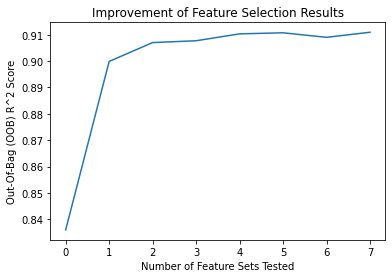

In [8]:
plt.xlabel('Number of Feature Sets Tested')
plt.ylabel('Out-Of-Bag (OOB) R^2 Score')
plt.title('Improvement of Feature Selection Results')
plt.plot(utb.scores);

In [9]:
utb._CV(utb._best_feature_set)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   14.2s finished
DEBUG: pred:  [0.97 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.
 0.   0.   0.   0.   0.   0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.9216673036904913
DEBUG: recall:  0.9766662166419153
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_job

(0.9484026534789403, 0.9484394147752273)

In [9]:
utb._n += 1
utb._get_r()

0.15000000000000002

In [11]:
with open('15K_sample_Mar_25_UTB.pickle', 'ab') as dbfile:
    pickle.dump(utb, dbfile, pickle.HIGHEST_PROTOCOL)

OSError: [Errno 28] No space left on device

In [7]:
utb._n.mean()

20.545454545454547

In [8]:
len(utb._states)

773

In [25]:
len([a for a in z_scores if a > 3])

4

(array([11., 11.,  4.,  3., 10., 12.,  3.,  9.,  6.,  9.]),
 array([1.23044393, 1.41083148, 1.59121903, 1.77160658, 1.95199413,
        2.13238168, 2.31276923, 2.49315679, 2.67354434, 2.85393189,
        3.03431944]),
 <BarContainer object of 10 artists>)

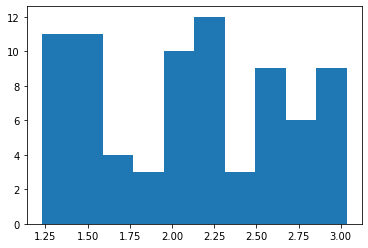

In [27]:
plt.hist(z_scores)

In [9]:
utb._max_oob

0.893880419906

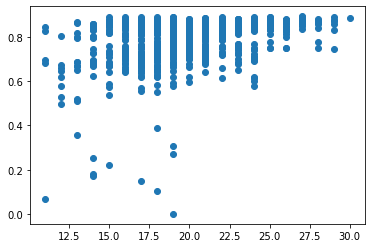

In [10]:
lengths = []
oobs = []
for fset in utb._states:
    lengths.append(len(fset))
    oobs.append(utb._states[fset].oob_score if utb._states[fset].oob_score else 0)
plt.scatter(lengths, oobs);

/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


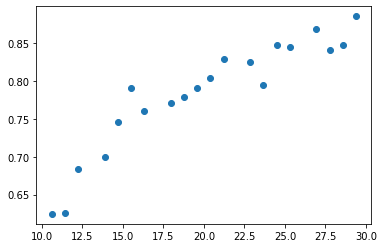

In [19]:
lengths_bins = np.linspace(0, 40)
oobs_binned = list()
for j in range(len(lengths_bins)):
    idx = [i for i in range(len(lengths)) if lengths[i] >= lengths_bins[j] and (j+1==len(lengths) or lengths[i] < lengths_bins[j+1])]
    oobs_binned.append(np.mean([oobs[i] for i in idx]))
plt.scatter(lengths_bins, oobs_binned);

In [21]:
import scipy
scipy.stats.pearsonr(lengths, oobs)

(0.3270145131232067, 1.0090247416415445e-20)

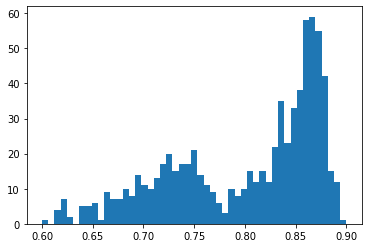

In [12]:
import numpy as np
plt.hist(oobs, bins=np.linspace(0.6, 0.9, 50));

In [20]:
utb._CV(utb._features[:20])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.9s finished
DEBUG: pred:  [0.83 0.   0.   0.   0.   0.   0.03 0.   0.   0.   0.74 0.   0.   0.
 0.   0.   0.   0.   0.   0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.9312114989733059
DEBUG: recall:  0.8820097244732577
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_job

(0.9023070191404295, 0.9026246664568013)

In [22]:
utb._model.oob_score_

0.8450892237581457

In [23]:
for fset, performance in utb._states.items():
    if performance.oob_score == utb._max_oob:
        best = fset
[str(f) for f in best]

['1th_" "',
 '0th_"."',
 '1th_"a"',
 '0th_"t"',
 '1th_"s "',
 '1th_", "',
 '0th_"5"',
 '0th_"o"',
 '3th_", "',
 '0th_" M"',
 '-4th_" "',
 '1th_"."',
 '-1th_"K"',
 '-2th_" "',
 '-1th_" "',
 '2th_"MID: "',
 '-1th_", "',
 '0th_". "',
 '2th_" "',
 '0th_"a"',
 '1th_"r"',
 '2th_"c"',
 '0th_", "',
 '1th_"n"',
 '-1th_"."',
 '-1th_"t"',
 'FORWARDPositionFeature']

In [24]:
utb._CV(best)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.9s finished
DEBUG: pred:  [0.84 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.91 0.01 0.   0.01
 0.01 0.   0.   0.   0.   0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.9312803889789303
DEBUG: recall:  0.9312803889789303
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_j

(0.9244223976616625, 0.9248120188213839)

In [25]:
len(best)

27

In [19]:
naive_best = [f for f in utb._features if not hasattr(f, '_i') or f._i in (-1, 0)][:30]
utb._CV(naive_best)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.9s finished
DEBUG: pred:  [0.91 0.03 0.01 0.01 0.01 0.01 0.01 0.19 0.   0.   0.55 0.02 0.02 0.02
 0.01 0.01 0.   0.   0.   0.1 ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.8465384615384616
DEBUG: recall:  0.7658315935977731
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_j

(0.8172467696505186, 0.817884952991671)

In [29]:
for n in range(3, 40, 5):
    print('Pearson r for improvement in first {}: {}'.format(
        n,
        scipy.stats.pearsonr(range(n), utb.scores[:n])))

Pearson r for improvement in first 3: (0.9485128832078169, 0.20517556163046646)
Pearson r for improvement in first 8: (0.4152054652101391, 0.30633673404531403)
Pearson r for improvement in first 13: (0.04461792606270175, 0.8849218609634789)
Pearson r for improvement in first 18: (0.12399979539507225, 0.6239800496194244)
Pearson r for improvement in first 23: (-0.06024108271716715, 0.7848204722794568)
Pearson r for improvement in first 28: (-0.08358065165284487, 0.6724086982407856)
Pearson r for improvement in first 33: (-0.2629722283348792, 0.1392530539485335)
Pearson r for improvement in first 38: (-0.06065166099855499, 0.7175570254929702)


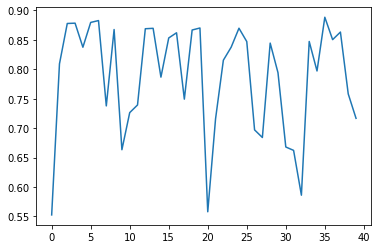

In [32]:
plt.plot(utb.scores[:40]);

In [40]:
max_oob_40 = max(utb.scores[:40])
max_oob_40

0.8882944907592716

In [38]:
best_in_40 = None
for f, performance in utb._states.items():
    if performance. == max_oob_40:
        best_in_40 = f
len(f)

19

In [39]:
utb._CV(f)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.8s finished
DEBUG: pred:  [0.36 0.19 0.01 0.01 0.01 0.01 0.05 0.   0.   0.02 0.75 0.   0.   0.
 0.   0.   0.   0.   0.   0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.83984375
DEBUG: recall:  0.766612641815235
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Do

(0.8013741158647413, 0.8018126417295178)

In [51]:
utb._states[f].oob_score

0.8518692614206552

In [43]:
import random
oobs = []
cvs = []
sample = random.sample(utb._states.keys(), 40)
for f in sample:
    oobs.append(utb._states[f].oob_score)
    cvs.append(utb._CV(f))
plt.scatter(oobs, cvs)

 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.8s finished
DEBUG: pred:  [0.43 0.16 0.14 0.04 0.03 0.03 0.05 0.   0.01 0.11 0.02 0.03 0.14 0.01
 0.   0.01 0.01 0.02 0.02 0.02]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.8188164893617021
DEBUG: recall:  0.8155629139072847
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(

ValueError: x and y must be the same size

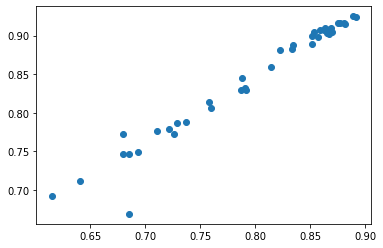

In [50]:
cvs_mean = [(cv[0] + cv[1]) / 2 for cv in cvs]
plt.scatter(oobs, cvs_mean);

In [53]:
scipy.stats.pearsonr(oobs, cvs_mean)

(0.9801917061679889, 2.482961591083244e-28)

In [54]:
max(cvs_mean)

0.9249849653613094

In [56]:
[m for m in cvs_mean if m > 0.91]

[0.9161966561117308,
 0.9163467819336827,
 0.9249849653613094,
 0.9145644888204888,
 0.9235301693430275,
 0.9164536463939857]

In [8]:
for f in utb._features[:100]:
    print(str(f), '->', utb._rankings[f])

FORWARDPositionFeature -> 33.47618943801642
0th_", " -> 14.704103336674766
-2th_" " -> 11.464084000991827
1th_", " -> 9.853162789019482
-1th_", " -> 8.508283767023954
-1th_" " -> 0.11518073568825238
-2th_", " -> -1.3580027396454208
0th_" " -> -1.560830834341362
0th_"e" -> -2.067056981595469
-1th_"a" -> -2.5619782449457698
-3th_", " -> -2.5679729609018196
-3th_" " -> -2.7414566223739403
1th_" " -> -5.346841488038678
2th_", " -> -5.676282229628756
2th_" " -> -5.7771812958165025
0th_"u" -> -6.0497999649552145
-4th_", " -> -6.860348781411542
-4th_" " -> -6.984502150845206
0th_". " -> -7.229524408290397
2th_"a" -> -8.897758347677625
-2th_"a" -> -9.390321383493465
0th_"." -> -9.69838117579954
1th_"a" -> -10.333706521883506
1th_". " -> -10.687244947174618
0th_"r" -> -11.125395965780529
1th_"u" -> -11.464737683260637
3th_". " -> -11.984294080180128
2th_"e" -> -12.049202427508288
1th_"." -> -12.197899620657177
0th_"a" -> -12.282668224379487
-2th_"e" -> -12.352601671880235
1th_"n" -> -13.2250988

In [18]:
[str(f) for f in utb._features[:30]]

['FORWARDPositionFeature',
 '-1th_" "',
 '0th_" "',
 '-1th_", "',
 '0th_", "',
 '1th_"e"',
 '-2th_"e"',
 '1th_"s"',
 '-2th_"."',
 '-2th_", "',
 '2th_"l"',
 '2th_"c"',
 '2th_"e "',
 '2th_" "',
 '-3th_", "',
 '-3th_"."',
 '2th_": "',
 '2th_". "',
 '2th_"n"',
 '2th_"e"',
 '2th_"r"',
 '2th_"s"',
 '-3th_"e"',
 '2th_"t"',
 '2th_"d"',
 '2th_"i"',
 '-3th_" "',
 '1th_", "',
 '-2th_"n"',
 '1th_"a"']

In [15]:
max(utb._states[f].cv_score for f in utb._states if utb._states[f].cv_score)

(0.8981218352971807, 0.8983532051214338)

got 465 fsets
got z scores


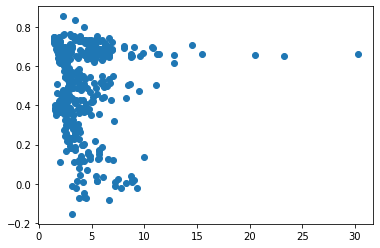

In [29]:
import random
fsets = list(f for f in utb._states.keys() if utb._states[f].oob_score)
print('got {} fsets'.format(len(fsets)))
def z_score(seq):
    return (utb._max_oob - np.mean(seq)) / np.std(seq)
z_scores = [
    z_score([utb._states[other].oob_score
    for other in utb._k_most_similar(10, f)]) for f in fsets
]
print('got z scores')
oob_scores = [utb._states[f].oob_score for f in fsets]
plt.scatter(z_scores, oob_scores);

In [31]:
import scipy
scipy.stats.pearsonr(z_scores, oob_scores)

(-0.028953523151053276, 0.5334160759122355)

In [41]:
rank_orders = [np.mean([utb._features.index(f) for f in fset if not hasattr(f, '_i') or f._i in (0, 1)]) for fset in fsets]

/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pdonovan/Documents/awca/CitationParser/env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


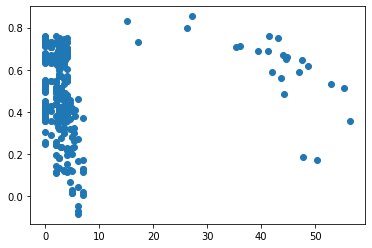

In [42]:
plt.scatter(rank_orders, oob_scores)

In [43]:
scipy.stats.pearsonr(rank_orders, oob_scores)

ValueError: array must not contain infs or NaNs

In [32]:
bad = [f for f in utb._states if utb._states[f].oob_score and utb._states[f].oob_score < 0.1]
bad

[frozenset({<MotifFeatures.MotifFeature.MotifFeature at 0x7f862903d1c0>})]

In [33]:
[str(f) for f in bad[0]]

['-1th_" "']

In [36]:
good = [f for f in utb._states if utb._states[f].oob_score and utb._states[f].oob_score > 0.8]
len(good)

7

In [40]:
strange = [f for f in good if utb._is_promising(f) > 2]
print(len(strange))
[[str(f) for f in strange[i]] for i in range(len(strange))]

1


[['-2th_"n"',
  '-1th_", "',
  '-2th_", "',
  '-2th_"."',
  '1th_"o"',
  'FORWARDPositionFeature',
  '-2th_"e"',
  '-1th_" "',
  '-2th_" "',
  '1th_"3"',
  '1th_"t"',
  '1th_"n"',
  '-2th_"r"',
  '1th_"i"',
  '1th_"n "',
  '1th_". "',
  '1th_"c"',
  '1th_"."',
  '1th_"e"']]

In [6]:
[str(f) for fset in utb._states for f in fset if f not in utb._importances]

[]

In [18]:
utb._knn_z

1

In [6]:
len(utb._states)

18

In [7]:
utb._max_oob

0.7774467299084082

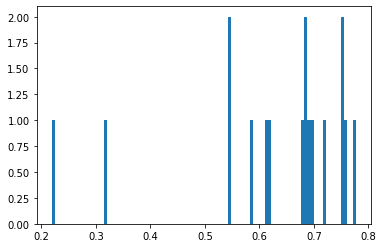

In [8]:
plt.hist([utb._states[f].oob_score for f in utb._states if utb._states[f].oob_score], bins=100);

In [9]:
for f in utb._features:
    try:
        if f._i not in (-1, 0): print(f._i)
    except:
        pass

-2
1
1
-2
1
1
-2
1
-2
-2
-2
1
1
1
1
1
1
-2
1
1
1


In [11]:
utb._features[1].successor() in utb._features

True

In [10]:
poor = [fset for fset in utb._states if utb._states[fset].oob_score and utb._states[fset].oob_score < 0.5]

In [11]:
chosen = poor[-1]
similar = utb._k_most_similar(20, chosen)
scores = [utb._states[fset].oob_score for fset in similar]
print(utb._states[chosen].oob_score)
scores

0.31886593484298187


[0.6193349898754159,
 0.7591890944245097,
 0.6919342012514993,
 0.21894089554461638,
 0.6806882569744354,
 0.7505043691713058,
 0.6871238979986042,
 0.5478109130225598,
 0.5862788770592133,
 0.6869085851649555,
 0.7774467299084082,
 0.7179121191656342,
 0.544616137228453,
 0.7515731794514993,
 0.6942401379458117,
 0.6152166872788812,
 0.31886593484298187]

In [12]:
import numpy as np
np.mean(scores), np.std(scores)

(0.6263873533122815, 0.1483904442991179)

In [13]:
from MotifFeatures.Utils.algs import set2vec
print(list(set2vec(utb._features[:10], chosen,
                        weights=utb._importances)))
print()
for fset in similar:
    print(list(set2vec(utb._features[:10], fset,
                        weights=utb._importances)))

[0.0, 0.08587898015384482, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.0, 0.0, 0.0676561340460158, 0.1250475056169679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22658080238398962, 0.0, 0.0, 0.1250475056169679, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22658080238398962, 0.0, 0.0, 0.1250475056169679, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22658080238398962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22658080238398962, 0.0, 0.0, 0.1250475056169679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22658080238398962, 0.08587898015384482, 0.0676561340460158, 0.0, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0676561340460158, 0.1250475056169679, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.08587898015384482, 0.0676561340460158, 0.1250475056169679, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.08587898015384482, 0.0, 0.0, 0.11564928346750024, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.08587898015384482, 0.0676561340460158, 0.1250475056169679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0

In [14]:
import scipy
[scipy.spatial.distance.cosine(
                    set2vec(utb._features[:10], chosen,
                        weights=utb._importances),
                    set2vec(utb._features[:10], other,
                        weights=utb._importances)
                ) for other in similar]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6898405636418887,
 1.0,
 0.575688592647668,
 0.40381878425306306,
 0.4829702758638533,
 0.6898405636418887,
 0.6586385402444711,
 0.575688592647668,
 0.6898405636418887,
 0.7100497614323652,
 0.0,
 0.0]

In [6]:
for featureset in utb._states:
    print(utb._states[featureset].oob_score, utb._states[featureset].cv_score)

0.26510773187279346 (0.402335900541211, 0.40256882149915657)
0.19819044800079322 (nan, nan)
0.07999646632752189 (nan, nan)
0.11327987396502193 (0.021195492638121156, 0.022713442004527497)
0.22461335926410642 (nan, nan)
0.5650789219691059 (0.6222504459320146, 0.6230137812418679)
0.43627532970620764 (0.4666241591735091, 0.46829339465235476)
0.4358428132614023 (0.4660184105484766, 0.4676473655844936)
0.5642444568586058 (0.6201208036592976, 0.6207578351395246)
0.2187618538570537 (nan, nan)
0.24934546205953845 (0.010218200074972907, 0.011043197014926232)
0.22461335926410642 (nan, nan)
0.11327987396502193 (0.010218200074972907, 0.011043197014926232)
0.2405913172333075 (0.016385663345129316, 0.016995691461710358)
0.24899730631908457 (0.04919110865041069, 0.050477691711668195)
0.5658429706335987 (0.6201035423458765, 0.620937651358767)
0.5653842049500402 (0.6197433716929419, 0.6205361979056998)
0.5642132688059753 (0.6201208036592976, 0.6207578351395246)
0.4358444264007031 (0.4650557680078522, 0

In [24]:
for f in utb._states:
    if utb._states[f].oob_score > 0.5:
        print(len(f), end=': ')
        print([str(el) if hasattr(el, '_motif') else 'p?' for el in f], end=' => ')
        print(utb._states[f].mean_cv())

2: ['-1th_", "', 'p?'] => 0.6226321135869413
2: ['0th_", "', 'p?'] => 0.6204393193994111
3: ['-1th_", "', '-1th_" "', 'p?'] => 0.6205205968523217
3: ['-1th_", "', '0th_" "', 'p?'] => 0.6201397847993209
3: ['0th_", "', '-1th_", "', 'p?'] => 0.6204393193994111
3: ['0th_", "', '-1th_" "', 'p?'] => 0.6186201606430113
3: ['0th_", "', '0th_" "', 'p?'] => 0.6181642390672507
4: ['-1th_", "', '0th_" "', '-1th_" "', 'p?'] => 0.6199599871477911
4: ['0th_", "', '-1th_", "', '-1th_" "', 'p?'] => 0.6179021677758658
4: ['0th_", "', '-1th_", "', '0th_" "', 'p?'] => 0.6168508667161314
4: ['0th_", "', '0th_" "', '-1th_" "', 'p?'] => 0.6170933294308887
5: ['0th_", "', '0th_" "', 'p?', '-1th_", "', '-1th_" "'] => 0.6163652478685634


In [18]:
for f in utb._features[:45]:
    try:
        print(str(f))
    except:
        print(repr(f))
        pass

-1th_", "
-1th_" "
0th_" "
0th_", "
0th_". "
0th_"r"
0th_"a"
0th_"e"
0th_"."
0th_"i"
0th_"s"
0th_"t"
0th_"n"
0th_"o"
0th_"2"
0th_"c"
0th_"1"
0th_"u"
0th_"d"
-1th_"e"
0th_"l"
0th_"m"
0th_"n "
0th_": "
0th_"s "
0th_"0"
-1th_"a"
0th_"in"
0th_"h"
0th_" a"
0th_"ID: "
0th_"f"
0th_"ti"
0th_"3"
0th_"D: "
-1th_" H"
0th_"6"
0th_"y"
-1th_"M, "
0th_"e "
0th_"MID: "
0th_" P"
0th_"9"


In [5]:
import scipy
utb._CV(utb._features[:5], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.1min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   11.5s finished
DEBUG: pred:  [0.82 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.
 0.   0.   0.18 0.   0.   0.01]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.7143437132069343
DEBUG: recall:  0.7024793388429752
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.1min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_job

(0.7076130676909922, 0.7078092812415084)

In [6]:
utb._CV(utb._features[:15], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 35.6min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.3s finished
DEBUG: pred:  [0.89 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.97 0.   0.   0.
 0.   0.   0.   0.   0.   0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.9061658129387213
DEBUG: recall:  0.9567725652017147
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 33.5min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_job

(0.9314494071872645, 0.9317887091104284)

In [7]:
utb._CV(utb._features[:30], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 49.3min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   14.4s finished
DEBUG: pred:  [0.82 0.   0.01 0.01 0.   0.   0.   0.   0.   0.92 0.   0.   0.   0.
 0.   0.   0.01 0.   0.   0.86]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
DEBUG: precision:  0.9153475567790778
DEBUG: recall:  0.957753240518483
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 47.4min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs

(0.9344782094887113, 0.9346239206612587)

In [8]:
utb._CV(utb._features[:60], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 51.6min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   23.5s finished
DEBUG: pred:  [0.87 0.   0.   0.   0.   0.   0.   0.   0.   0.06 0.   0.   0.91 0.
 0.01 0.   0.   0.   0.01 0.  ]
DEBUG: actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
DEBUG: precision:  0.913816425120773
DEBUG: recall:  0.949140976236352


KeyboardInterrupt: 

In [6]:
[str(feature) for feature in utb._features[:10]]

['-1th_", "',
 '0th_", "',
 '0th_" "',
 '0th_". "',
 '-1th_"J, "',
 '-1th_" "',
 '-1th_"H, "',
 '-1th_" S"',
 '-1th_" K"',
 '-1th_" W"']

In [5]:
X, y = utb._X(), utb._labels()

In [26]:
regr = RandomForestRegressor(
    random_state=0, verbose=1, n_jobs=-1)

In [27]:
t0 = time.time()
regr.fit(X, y)
print('Elapsed time:', time.time() - t0)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.8min
Elapsed time: 593.4815990924835
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  9.9min finished


In [30]:
[
    X.columns[idx] + ' -> ' + str(regr.feature_importances_[idx])
    for idx in range(len(X.columns))
    if regr.feature_importances_[idx] > 0.0014
]

['-1th_"i" -> 0.03139330469785673',
 '-1th_" " -> 0.030653403690900877',
 '-1th_"r" -> 0.002516241148017014',
 '-1th_"e" -> 0.05082396238975671',
 '-1th_"n" -> 0.004698896506257944',
 '-1th_"a" -> 0.04924226826706511',
 '-1th_"t" -> 0.00352795080863393',
 '-1th_"s" -> 0.005556928071292358',
 '-1th_"o" -> 0.03615993932352817',
 '-1th_". " -> 0.031609844380332396',
 '-1th_"." -> 0.0015290126610194186',
 '-1th_", " -> 0.1252682644062291',
 '-1th_"u" -> 0.015811471513609097',
 '-1th_"h" -> 0.0062621085694191',
 '-1th_"m" -> 0.0014475392387895741',
 '-1th_"M" -> 0.0024070756119629966',
 '-1th_"e " -> 0.005769372641047589',
 '-1th_"y" -> 0.005068830645877607',
 '-1th_"S" -> 0.004563153390237448',
 '-1th_"A" -> 0.0026830181413667734',
 '-1th_"C" -> 0.002325269359642735',
 '-1th_"J" -> 0.003336292566078514',
 '0th_"i" -> 0.025638028692881412',
 '0th_" " -> 0.08368215974583824',
 '0th_"r" -> 0.014615038521526562',
 '0th_"e" -> 0.02441914534215503',
 '0th_"n" -> 0.002964311322686968',
 '0th_"a" 

(array([133.,  30.,   7.,   4.,   5.,   1.,   1.,   0.,   1.,   1.,   1.,
          3.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00140581, 0.00281162, 0.00421743, 0.00562323,
        0.00702904, 0.00843485, 0.00984066, 0.01124647, 0.01265228,
        0.01405808, 0.01546389, 0.0168697 , 0.01827551, 0.01968132,
        0.02108713, 0.02249293, 0.02389874, 0.02530455, 0.02671036,
        0.02811617, 0.02952198, 0.03092778, 0.

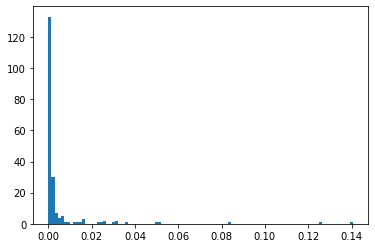

In [28]:
plt.hist(regr.feature_importances_, bins=100)

(array([ 92., 395., 113.,  69.,  57.,  30.,  30.,  19.,  16.,  28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

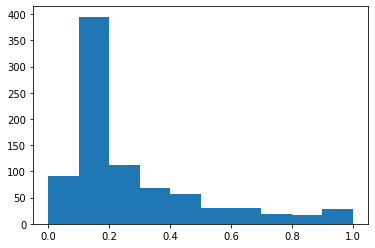

In [37]:
import random
frequencies = set()
sample_raws = set(author_tags.raw)
for motif in motifs:
    frequencies.add(
        sum(1 if motif in text else 0 for text in sample_raws)
        / len(sample_raws))
plt.hist(frequencies)

In [38]:
len(sample_raws)

33292